# Capstone Project - Factors affecting drinking in students between ages 15 & 19

#### Loaded Portuguese Class Data - Math Class only added 13 unique data points, which isn't very much out of almost 700

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('student-portuguese.csv')

In [20]:
#other libraries to import

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [21]:
#checked data completeness - looks like there are no nulls
print(df.count())

school        649
sex           649
age           649
address       649
famsize       649
Pstatus       649
Medu          649
Fedu          649
Mjob          649
Fjob          649
reason        649
guardian      649
traveltime    649
studytime     649
failures      649
schoolsup     649
famsup        649
paid          649
activities    649
nursery       649
higher        649
internet      649
romantic      649
famrel        649
freetime      649
goout         649
Dalc          649
Walc          649
health        649
absences      649
G1            649
G2            649
G3            649
dtype: int64


In [39]:
#checking unique answers for drinking levels questions - was curioius if there would be any zeros

print(port['Dalc'].unique())
print(port['Walc'].unique())


[1 2 5 3 4]
[1 3 2 4 5]


In [41]:
df['age'].unique()

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

#### Interesting to see that the age ranged from 15 to 22. Decided to look at the data and see how many data points in each age group

In [45]:
df.groupby('age').count()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,,,,,,,,,,,,,,,,,,,,,
15,112,112,112,112,112,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112
16,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
17,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
18,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
19,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
20,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
21,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
22,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### Due to the fact that 20, 21, and 22 year-olds have 6, 2, and 1 student respectively, I will drop all three to avoid skewing the data due to factors relating to age that I can't easily account for, so I am going to filter out all ages where len(age) is less than or equal to 20. Leaving 19 (32 lines) for now.

In [49]:
df = df.groupby('age').filter(lambda x: len(x)>20)

In [50]:
#verify that the dataset now looks as I expect

df.groupby('age').count()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,,,,,,,,,,,,,,,,,,,,,
15,112,112,112,112,112,112,112,112,112,112,...,112,112,112,112,112,112,112,112,112,112
16,177,177,177,177,177,177,177,177,177,177,...,177,177,177,177,177,177,177,177,177,177
17,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
18,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
19,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


I am treating this as a classification problem where there are five possible categories for weekend and weekday drinking. I want to see if weekend and weekday drinking are strongly correlated and how they are distributed, so I'm creating dummy variables  for Dalc and Walc

In [86]:
df=df.join(pd.get_dummies(df['Walc'], drop_first=True), lsuffix='Walc')

In [132]:
df=df.join(pd.get_dummies(df['Dalc'], drop_first=True), rsuffix='Dalc')

In [160]:
df=df.join(pd.get_dummies(df['sex'], drop_first=True), lsuffix='sex') #not sure when to use lsuffix vs. rsuffix

In [162]:
df.groupby('health').count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,2Walc,3Walc,4Walc,5Walc,2Dalc,3Dalc,4Dalc,5Dalc,M
health,,,,,,,,,,,,,,,,,,,,,
1,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
2,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
3,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
4,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
5,246,246,246,246,246,246,246,246,246,246,...,246,246,246,246,246,246,246,246,246,246


In [161]:
list(df)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3',
 '2Walc',
 '3Walc',
 '4Walc',
 '5Walc',
 '2Dalc',
 '3Dalc',
 '4Dalc',
 '5Dalc',
 'M']

school        640
sex           640
age           640
address       640
famsize       640
Pstatus       640
Medu          640
Fedu          640
Mjob          640
Fjob          640
reason        640
guardian      640
traveltime    640
studytime     640
failures      640
schoolsup     640
famsup        640
paid          640
activities    640
nursery       640
higher        640
internet      640
romantic      640
famrel        640
freetime      640
goout         640
Dalc          640
Walc          640
health        640
absences      640
G1            640
G2            640
G3            640
2Walc         640
3Walc         640
4Walc         640
5Walc         640
2Dalc         640
3Dalc         640
4Dalc         640
5Dalc         640
dtype: int64

In [51]:
#weekday alcohol consumption
df.groupby('Dalc').count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Walc,health,absences,G1,G2,G3
Dalc,,,,,,,,,,,,,,,,,,,,,
1,446,446,446,446,446,446,446,446,446,446,...,446,446,446,446,446,446,446,446,446,446
2,119,119,119,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119
3,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
4,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
5,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15


In [64]:
#weekend alcohol consumption
df.groupby('Walc').count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,health,absences,G1,G2,G3
Walc,,,,,,,,,,,,,,,,,,,,,
1,244,244,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,244,244,244,244
2,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
3,119,119,119,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119
4,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
5,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


<IPython.core.display.Javascript object>


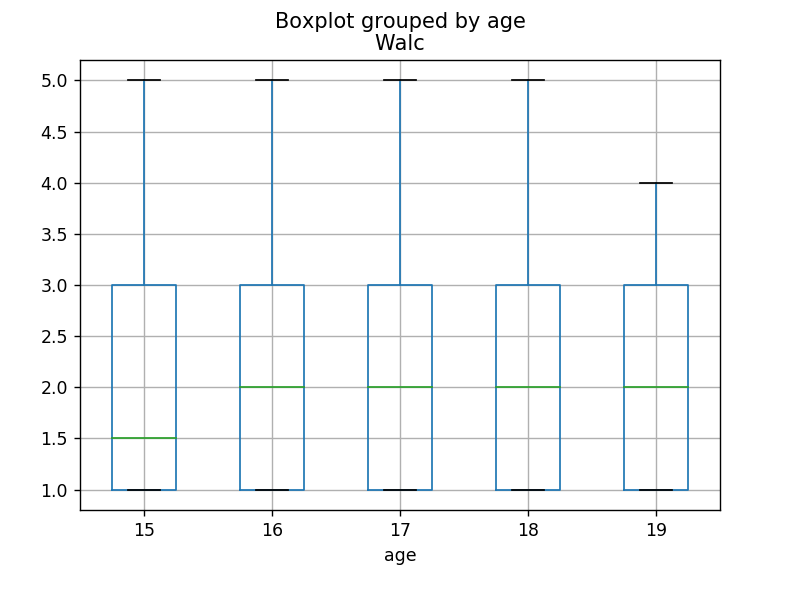

In [67]:
%matplotlib notebook
WalcVsAge=df.boxplot(column='Walc', by='age')

<IPython.core.display.Javascript object>


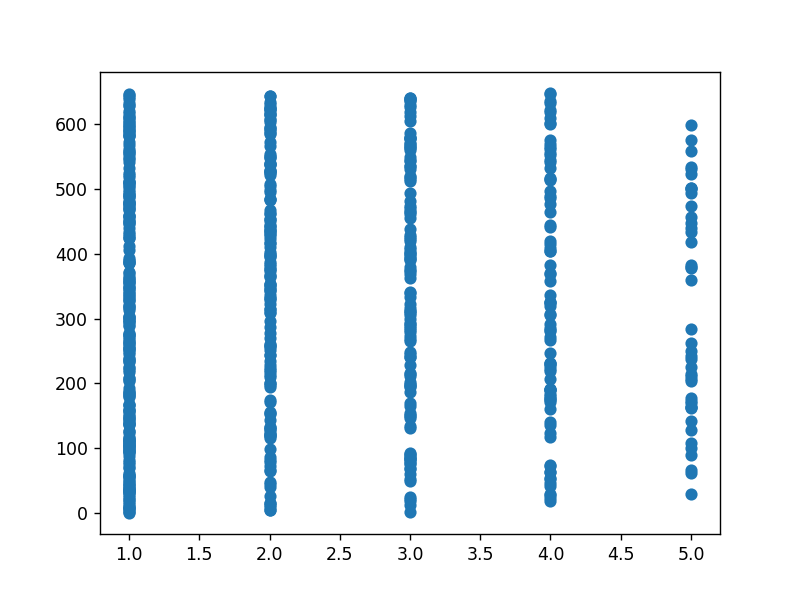

In [71]:
%matplotlib notebook

plt.scatter(df['Walc'], df.index)

#### This does mean you can join the two dataframes into a single one! Try doing this using the pandas merge function.

In [27]:
print(list(df_rr.columns.values))
print(list(df_ui.columns.values))

['Reviewer', 'Cuisine', 'HasSetMenu', 'YelpStars', 'SellsCoffee', 'SellsBeer', 'SellsWine', 'SellsSpirits', 'Price']
['ID', 'Age', 'Gender', 'Height', 'Weight', 'WearsGlasses', 'Home', 'Salary', 'DrinksCoffee', 'DrinksBeer', 'DrinksWine', 'DrinksSpirits', 'IsVegan', 'IsVegetarian']


In [29]:
#ME

df = df_ui.merge(df_rr, left_on='ID', right_on='Reviewer', how='left').drop('Reviewer', axis=1)
df.set_index('ID', inplace=True)

#to view all columns:
pd.set_option('display.max_columns', len(df.columns)+1)
df.head()

,Age,Gender,Height,Weight,WearsGlasses,Home,Salary,DrinksCoffee,DrinksBeer,DrinksWine,DrinksSpirits,IsVegan,IsVegetarian,Cuisine,HasSetMenu,YelpStars,SellsCoffee,SellsBeer,SellsWine,SellsSpirits,Price
ID,,,,,,,,,,,,,,,,,,,,,
1,15,male,175,77,yes,suburban,3,1,1,2,0,0,0,French,no,2.5,1,1,1,1,50
2,49,female,171,75,no,rural,0,0,0,1,1,0,0,Indian,no,1.0,1,2,2,1,12
3,63,female,147,55,no,suburban,1,1,0,0,0,0,0,Indian,no,3.5,1,1,0,1,47
4,75,male,170,82,no,rural,3,1,0,0,0,0,0,Italian,no,0.5,0,0,1,1,23
5,46,female,159,64,yes,suburban,1,0,1,0,1,0,0,French,yes,2.0,2,1,1,1,36


In [30]:
#IN CLASS

df2=df.drop(['WearsGlasses', 'IsVegan', 'IsVegetarian', 'Height', 'Weight', 'Gender'], axis=1) #also got rid of reviewer

#### At this point, your data is now unified in a single dataframe. However, you will be unable to regress over many of these variables. Add dummy variables where appropriate. Feel free to ignore any columns which you feel are obviously superfluous.

In [40]:
#ME: df=df.join(pd.get_dummies(df['Home'], drop_first=True))
#Class:
#df3=df2.join(pd.get_dummies(df2[['Home', 'Salary', 'DrinksCoffee','Cuisine','HasSetMenu']], 
#                            prefix=['Home', 'Salary', 'DrinksCoffee', 'Cuisine', 'HasSetMenu'],
#                            drop_first=True)
#SEE CLASS CODE FOR BETTER DUMMY VARIABLE THING
#df['is_male'] = df['Gender'].apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
#Do we need to check whether price is normally distributed?
## No, though it gives the regression some nice properties,the regression will still work

Huber and Ransak: Robust regressions that lessen the impact of outliers because they are not minimizing the square error
    
Lasso penalizes the absolute value of the terms

Ridge penalizes the weights with the square of their size, rather than the absolute value, but it makes them smaller, not zero (unlike Lasso)

In [41]:
df2.head()

,Age,Home,Salary,DrinksCoffee,DrinksBeer,DrinksWine,DrinksSpirits,Cuisine,HasSetMenu,YelpStars,SellsCoffee,SellsBeer,SellsWine,SellsSpirits,Price
ID,,,,,,,,,,,,,,,
1,15,suburban,3,1,1,2,0,French,no,2.5,1,1,1,1,50
2,49,rural,0,0,0,1,1,Indian,no,1.0,1,2,2,1,12
3,63,suburban,1,1,0,0,0,Indian,no,3.5,1,1,0,1,47
4,75,rural,3,1,0,0,0,Italian,no,0.5,0,0,1,1,23
5,46,suburban,1,0,1,0,1,French,yes,2.0,2,1,1,1,36


In [47]:
df.join(pd.get_dummies(df['Cuisine'], drop_first=True)).head #This will create dummies AND leave the old variable in

df4= pd.get_dummies(df['HasSetMenu'], drop_first=True).head #This will create dummies AND leave the old variable in

df4.head()


#For LASSO, you typically want to use the log scale for the penalties



AttributeError: 'function' object has no attribute 'head'

In [12]:
df.head()

,Age,Gender,Height,Weight,WearsGlasses,Home,Salary,DrinksCoffee,DrinksBeer,DrinksWine,DrinksSpirits,...,Cuisine,HasSetMenu,YelpStars,SellsCoffee,SellsBeer,SellsWine,SellsSpirits,Price,suburban,urban,is_male
ID,,,,,,,,,,,,,,,,,,,,,,,
1,15,male,175,77,yes,suburban,3,1,1,2,0,...,French,no,2.5,1,1,1,1,50,1,0,1
2,49,female,171,75,no,rural,0,0,0,1,1,...,Indian,no,1.0,1,2,2,1,12,0,0,0
3,63,female,147,55,no,suburban,1,1,0,0,0,...,Indian,no,3.5,1,1,0,1,47,1,0,0
4,75,male,170,82,no,rural,3,1,0,0,0,...,Italian,no,0.5,0,0,1,1,23,0,0,1
5,46,female,159,64,yes,suburban,1,0,1,0,1,...,French,yes,2.0,2,1,1,1,36,1,0,0


In [13]:
df['SetMenu']= df['HasSetMenu'].apply(lambda x: 1 if x == 'yes' else 0)

In [14]:
df.drop(['Height', 'WearsGlasses', 'Home', 'Gender', 'HasSetMenu'], axis=1, inplace=True)
df.head()

,Age,Weight,Salary,DrinksCoffee,DrinksBeer,DrinksWine,DrinksSpirits,IsVegan,IsVegetarian,Cuisine,YelpStars,SellsCoffee,SellsBeer,SellsWine,SellsSpirits,Price,suburban,urban,is_male,SetMenu
ID,,,,,,,,,,,,,,,,,,,,
1,15,77,3,1,1,2,0,0,0,French,2.5,1,1,1,1,50,1,0,1,0
2,49,75,0,0,0,1,1,0,0,Indian,1.0,1,2,2,1,12,0,0,0,0
3,63,55,1,1,0,0,0,0,0,Indian,3.5,1,1,0,1,47,1,0,0,0
4,75,82,3,1,0,0,0,0,0,Italian,0.5,0,0,1,1,23,0,0,1,0
5,46,64,1,0,1,0,1,0,0,French,2.0,2,1,1,1,36,1,0,0,1


In [15]:
df['Cuisine'].unique()

array(['French', 'Indian', 'Italian', 'American', 'Mexican'], dtype=object)

In [16]:
df=df.join(pd.get_dummies(df['Cuisine'], drop_first=True))

In [204]:
df.head()

,Age,Weight,Salary,DrinksCoffee,DrinksBeer,DrinksWine,DrinksSpirits,IsVegan,IsVegetarian,Cuisine,...,SellsSpirits,Price,suburban,urban,is_male,SetMenu,French,Indian,Italian,Mexican
ID,,,,,,,,,,,,,,,,,,,,,
1,15,77,3,1,1,2,0,0,0,French,...,1,50,1,0,1,0,1,0,0,0
2,49,75,0,0,0,1,1,0,0,Indian,...,1,12,0,0,0,0,0,1,0,0
3,63,55,1,1,0,0,0,0,0,Indian,...,1,47,1,0,0,0,0,1,0,0
4,75,82,3,1,0,0,0,0,0,Italian,...,1,23,0,0,1,0,0,0,1,0
5,46,64,1,0,1,0,1,0,0,French,...,1,36,1,0,0,1,1,0,0,0


In [205]:
df.drop(['Weight', 'Cuisine'], axis=1, inplace=True)

In [206]:
df.head()

,Age,Salary,DrinksCoffee,DrinksBeer,DrinksWine,DrinksSpirits,IsVegan,IsVegetarian,YelpStars,SellsCoffee,...,SellsSpirits,Price,suburban,urban,is_male,SetMenu,French,Indian,Italian,Mexican
ID,,,,,,,,,,,,,,,,,,,,,
1,15,3,1,1,2,0,0,0,2.5,1,...,1,50,1,0,1,0,1,0,0,0
2,49,0,0,0,1,1,0,0,1.0,1,...,1,12,0,0,0,0,0,1,0,0
3,63,1,1,0,0,0,0,0,3.5,1,...,1,47,1,0,0,0,0,1,0,0
4,75,3,1,0,0,0,0,0,0.5,0,...,1,23,0,0,1,0,0,0,1,0
5,46,1,0,1,0,1,0,0,2.0,2,...,1,36,1,0,0,1,1,0,0,0


#### Using the tools you've used in class, try to predict the price an individual will be willing to pay for a given meal based on the characteristics of the restaurant and the individual.

**Note:** This may require a bit of exploration. Don't worry if your results aren't perfect, but try to derive a model with some predictive power. 

In [8]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib notebook

age = df['Age'].corr(df['Price'], method='spearman')
print 'The Spearman Correlation is: '
print age

plt.scatter(df['Age'], df['Price'])
plt.ylabel('Age')
plt.xlabel('Price')
plt.title('Age vs Price')


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-8-1da8aa8888ec>, line 7)

<IPython.core.display.Javascript object>


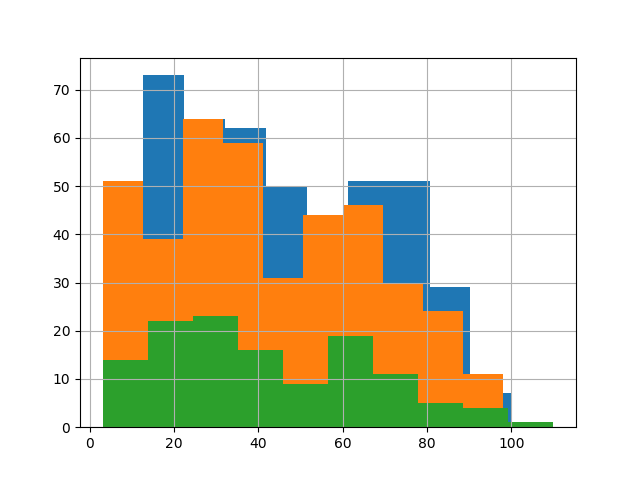

DrinksWine
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
Name: Price, dtype: object

In [208]:
%matplotlib notebook

# Wine drinking affect price?
df.groupby('DrinksWine')['Price'].hist()


In [209]:
print(list(df.columns.values))

['Age', 'Salary', 'DrinksCoffee', 'DrinksBeer', 'DrinksWine', 'DrinksSpirits', 'IsVegan', 'IsVegetarian', 'YelpStars', 'SellsCoffee', 'SellsBeer', 'SellsWine', 'SellsSpirits', 'Price', 'suburban', 'urban', 'is_male', 'SetMenu', 'French', 'Indian', 'Italian', 'Mexican']


In [210]:
from sklearn import linear_model
import sklearn.model_selection as ms
import sklearn.linear_model as lm

ARB_CONST = 172

from sklearn.model_selection import GridSearchCV

ARB_CONST = 172
train_x, test_x, train_y, test_y = ms.train_test_split(df, y, test_size=0.2, random_state=ARB_CONST) 

gs = GridSearchCV(estimator=lm.Ridge(),
                  cv=5, 
                  param_grid={'alpha': np.logspace(-10, 10, 21)},
                  scoring='neg_mean_squared_error')
gs.fit(train_x, train_y)

print(gs.best_params_)
print(gs.best_estimator_.coef_)
print(gs.best_estimator_.intercept_)


{'alpha': 1e-10}
[  7.54903167e-17   3.40867092e-14   8.58273458e-15  -3.63652186e-15
   1.52030839e-14  -4.65278329e-15   2.89137422e-15  -2.10899485e-15
   1.77020701e-13   1.00632252e-14  -2.64461135e-15   1.91635683e-14
  -1.74936111e-16   1.00000000e+00  -5.78300773e-15  -7.15907992e-15
  -1.06318489e-15   1.26929684e-14   1.72614475e-13   5.49759133e-14
   1.07563581e-13   4.86430121e-14]
-1.56319401867e-13


In [211]:
df=df.join(pd.get_dummies(df['DrinksWine'], drop_first=True))

In [212]:
df.head()

,Age,Salary,DrinksCoffee,DrinksBeer,DrinksWine,DrinksSpirits,IsVegan,IsVegetarian,YelpStars,SellsCoffee,...,suburban,urban,is_male,SetMenu,French,Indian,Italian,Mexican,1,2
ID,,,,,,,,,,,,,,,,,,,,,
1,15,3,1,1,2,0,0,0,2.5,1,...,1,0,1,0,1,0,0,0,0,1
2,49,0,0,0,1,1,0,0,1.0,1,...,0,0,0,0,0,1,0,0,1,0
3,63,1,1,0,0,0,0,0,3.5,1,...,1,0,0,0,0,1,0,0,0,0
4,75,3,1,0,0,0,0,0,0.5,0,...,0,0,1,0,0,0,1,0,0,0
5,46,1,0,1,0,1,0,0,2.0,2,...,1,0,0,1,1,0,0,0,0,0


In [216]:
import sklearn.linear_model as lm
import numpy as np

lin = lm.LinearRegression()
huber = lm.HuberRegressor()
ransac = lm.RANSACRegressor()


In [214]:
print(list(df.columns.values))

['Age', 'Salary', 'DrinksCoffee', 'DrinksBeer', 'DrinksWine', 'DrinksSpirits', 'IsVegan', 'IsVegetarian', 'YelpStars', 'SellsCoffee', 'SellsBeer', 'SellsWine', 'SellsSpirits', 'Price', 'suburban', 'urban', 'is_male', 'SetMenu', 'French', 'Indian', 'Italian', 'Mexican', 1L, 2L]


<IPython.core.display.Javascript object>


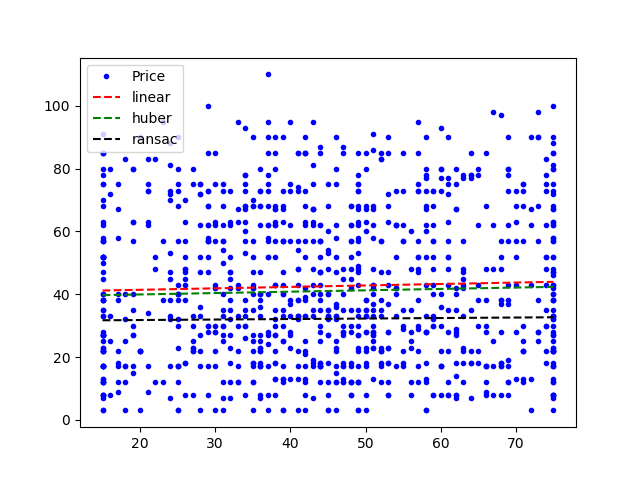

In [218]:
%matplotlib notebook
import matplotlib.pyplot as plt

for model in [lin, huber, ransac]:
    model.fit(df['Age'].values[:, np.newaxis], df['Price'])

xrng = np.arange(df['Age'].min(), df['Age'].max(), .01)[:, np.newaxis]
plt.plot(df['Age'], df['Price'], '.b')
plt.plot(xrng, lin.predict(xrng), '--r', label='linear')
plt.plot(xrng, huber.predict(xrng), '--g', label='huber')
plt.plot(xrng, ransac.predict(xrng), '--k', label='ransac')
plt.legend(loc='upper left')

<IPython.core.display.Javascript object>


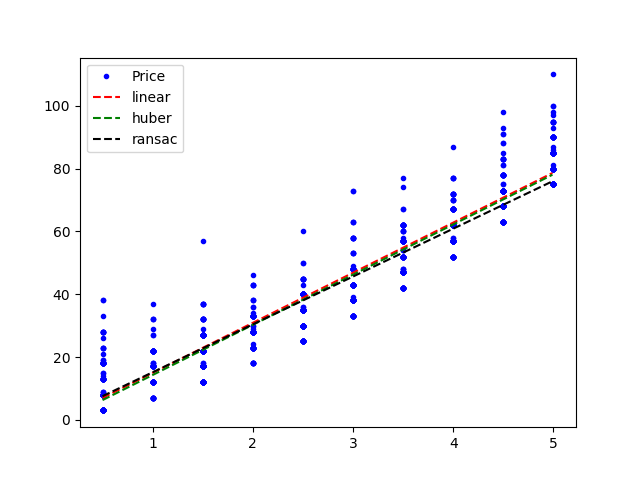

In [219]:
%matplotlib notebook
import matplotlib.pyplot as plt

for model in [lin, huber, ransac]:
    model.fit(df['YelpStars'].values[:, np.newaxis], df['Price'])

xrng = np.arange(df['YelpStars'].min(), df['YelpStars'].max(), .01)[:, np.newaxis]
plt.plot(df['YelpStars'], df['Price'], '.b')
plt.plot(xrng, lin.predict(xrng), '--r', label='linear')
plt.plot(xrng, huber.predict(xrng), '--g', label='huber')
plt.plot(xrng, ransac.predict(xrng), '--k', label='ransac')
plt.legend(loc='upper left')

#### Using a statistical test, demonstrate that your predicted values are better than random chance at guessing the correct price.

Answer here was to see if you're better than the average of your actual prices. Take the mean of each column
Make that the model
Then compare your error to the mean
Test for that (high-level, review answers)

If you think your errors are noraml you can do a paired T test
OW you can do the sin rank